In [5]:
from keras.models import load_model
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
def show_image(image):
    plt.imshow(test_image)
    plt.axis('off')
    plt.show()

In [3]:
model = load_model("cnn_image_classifier.h5")

In [4]:
test_image = imread("https://i.ytimg.com/vi/SfLV8hD7zX4/maxresdefault.jpg")

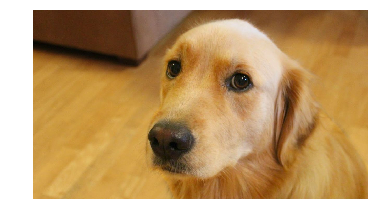

In [8]:
show_image(test_image)

ValueError: Error when checking : expected input_1 to have 4 dimensions, but got array with shape (720, 1280, 3)